In [18]:
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [19]:
df_original = pd.read_csv("main_with_tpo.csv").drop(columns=["Tours"])
df_original.head(20)

,Node,Agent,ConstraintRatio,MaxTimeGap,Solver,Iteration,Cost,Time[s]
0,5,1,1.0,10,milp,1,112.0,0.017707
1,5,1,1.0,10,milp,2,80.0,0.011811
2,5,1,1.0,10,milp,3,140.0,0.010948
3,5,1,1.0,10,milp,4,156.0,0.011781
4,5,1,1.0,10,milp,5,116.0,0.010050
5,5,1,1.0,10,ortools,1,216.0,0.012968
6,5,1,1.0,10,ortools,2,180.0,0.003126
7,5,1,1.0,10,ortools,3,204.0,0.004866
8,5,1,1.0,10,ortools,4,252.0,0.005468
9,5,1,1.0,10,ortools,5,174.0,0.006282


In [20]:
# Replace the time of the rows whose costs are infinite
### Inplace
df = copy.deepcopy(df_original)
df.loc[df["Cost"]==-1, "Time[s]"] = 0
df.loc[df["Cost"]==float('inf'), "Time[s]"] = 600

### Edit the copied df.
# df[df["Cost"] == float("inf")]["Time[s]"] = 180

In [21]:
# df.groupby(["Node", "ConstraintRatio", "MaxTimeGap", "Agent", "Solver"])[
#     ["Time[s]", "Cost"]
# ].median().reset_index()

In [22]:
df.loc[(df["MaxTimeGap"] == 10) & (df["ConstraintRatio"] == 0.75)]\
    .set_index(["Node", "Agent", "Solver"]).head()

ConstraintRatio  MaxTimeGap  Iteration   Cost   Time[s]
Node Agent Solver                                                         
5    1     milp               0.75          10          1   78.0  0.011650
           milp               0.75          10          2  108.0  0.012555
           milp               0.75          10          3  126.0  0.012002
           milp               0.75          10          4  106.0  0.009537
           milp               0.75          10          5  116.0  0.012335

In [23]:
df.loc[(df["MaxTimeGap"] == 10) & (df["ConstraintRatio"] == 0.75)]\
    .groupby(["Node", "Agent", "Solver"])['Time[s]'].mean().head()

Node  Agent  Solver 
5     1      milp       0.011616
             ortools    0.004128
      10     milp       0.006972
             ortools    0.046708
      20     milp       0.007026
Name: Time[s], dtype: float64

In [24]:
df.loc[(df["MaxTimeGap"] == 10) & (df["ConstraintRatio"] == 0.75)]\
    .groupby(["Node", "Agent", "Solver"])['Time[s]'].mean().reset_index()\
    .set_index(["Node", "Agent", "Solver"]).unstack().head()

Time[s]          
Solver          milp   ortools
Node Agent                    
5    1      0.011616  0.004128
     10     0.006972  0.046708
     20     0.007026  0.066217
     30     0.006909  0.085503
     40     0.006937  0.109284

['milp' 'ortools']
[ 5 10 20 40 60 80]
[1.   0.75 0.5  0.25]
[10 30 50]
[ 1 10 20 30 40]


/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)


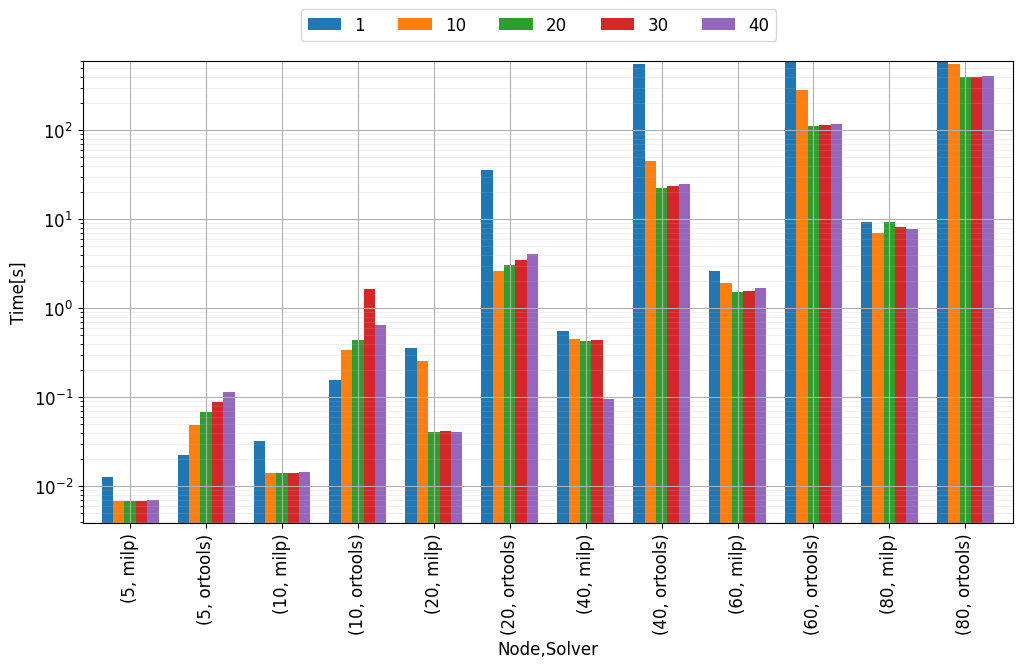

In [29]:
plt.rcParams.update({"font.size": 12})


Solvers = df["Solver"].unique()
print(Solvers)

Nodes = df["Node"].unique()
print(Nodes)

ConstraintRatio = df["ConstraintRatio"].unique()
print(ConstraintRatio)
# ConstraintRatio = [0.25]

MaxTimeGap = df["MaxTimeGap"].unique()
print(MaxTimeGap)
# MaxTimeGap = [30]

Agents = df["Agent"].unique()
print(Agents)

xLabel = "MaxTimeGap"
yLabel = "ConstraintRatio"
zLabel = "Solver"
xElems = MaxTimeGap
yElems = ConstraintRatio
zElems = Solvers
evalColumn = "Time[s]"


fig, ax = plt.subplots(figsize=(12, 6))
df.groupby(["Node", "Agent", "Solver"])['Time[s]'].mean().reset_index()\
    .set_index(["Node", "Solver", "Agent"]).unstack()\
    .plot(
        kind="bar",
        y="Time[s]",
        grid=True,
        # rot=0,
        ax=ax,
        ylim=(0, 600),
        legend=False,
        logy=True,
        width=0.75,
    )
ax.set_yscale("log")

ax.grid("on", which="minor", axis="x", alpha=0.2)
ax.grid("on", which="minor", axis="y", alpha=0.2)
ax.set_ylabel("Time[s]")

consts = {c: df[c].iloc[0] for c in df.columns if len(df[c].unique()) == 1}
const_strs = [f"{k}={v}" for k, v in consts.items()]
const_str = " ".join(const_strs)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# fig.tight_layout()
plt.legend(
    bbox_to_anchor=(0.3, 0.9),
    loc="lower left",
    bbox_transform=fig.transFigure,
    ncol=len(Agents)*len(Solvers),
)
plt.savefig(f"benchmark.png", dpi=300)

['milp' 'ortools']
[ 5 10 20 40 60 80]
[1.   0.75 0.5  0.25]
[10 30 50]
[ 1 10 20 30 40]


/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/home/kandai/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/home

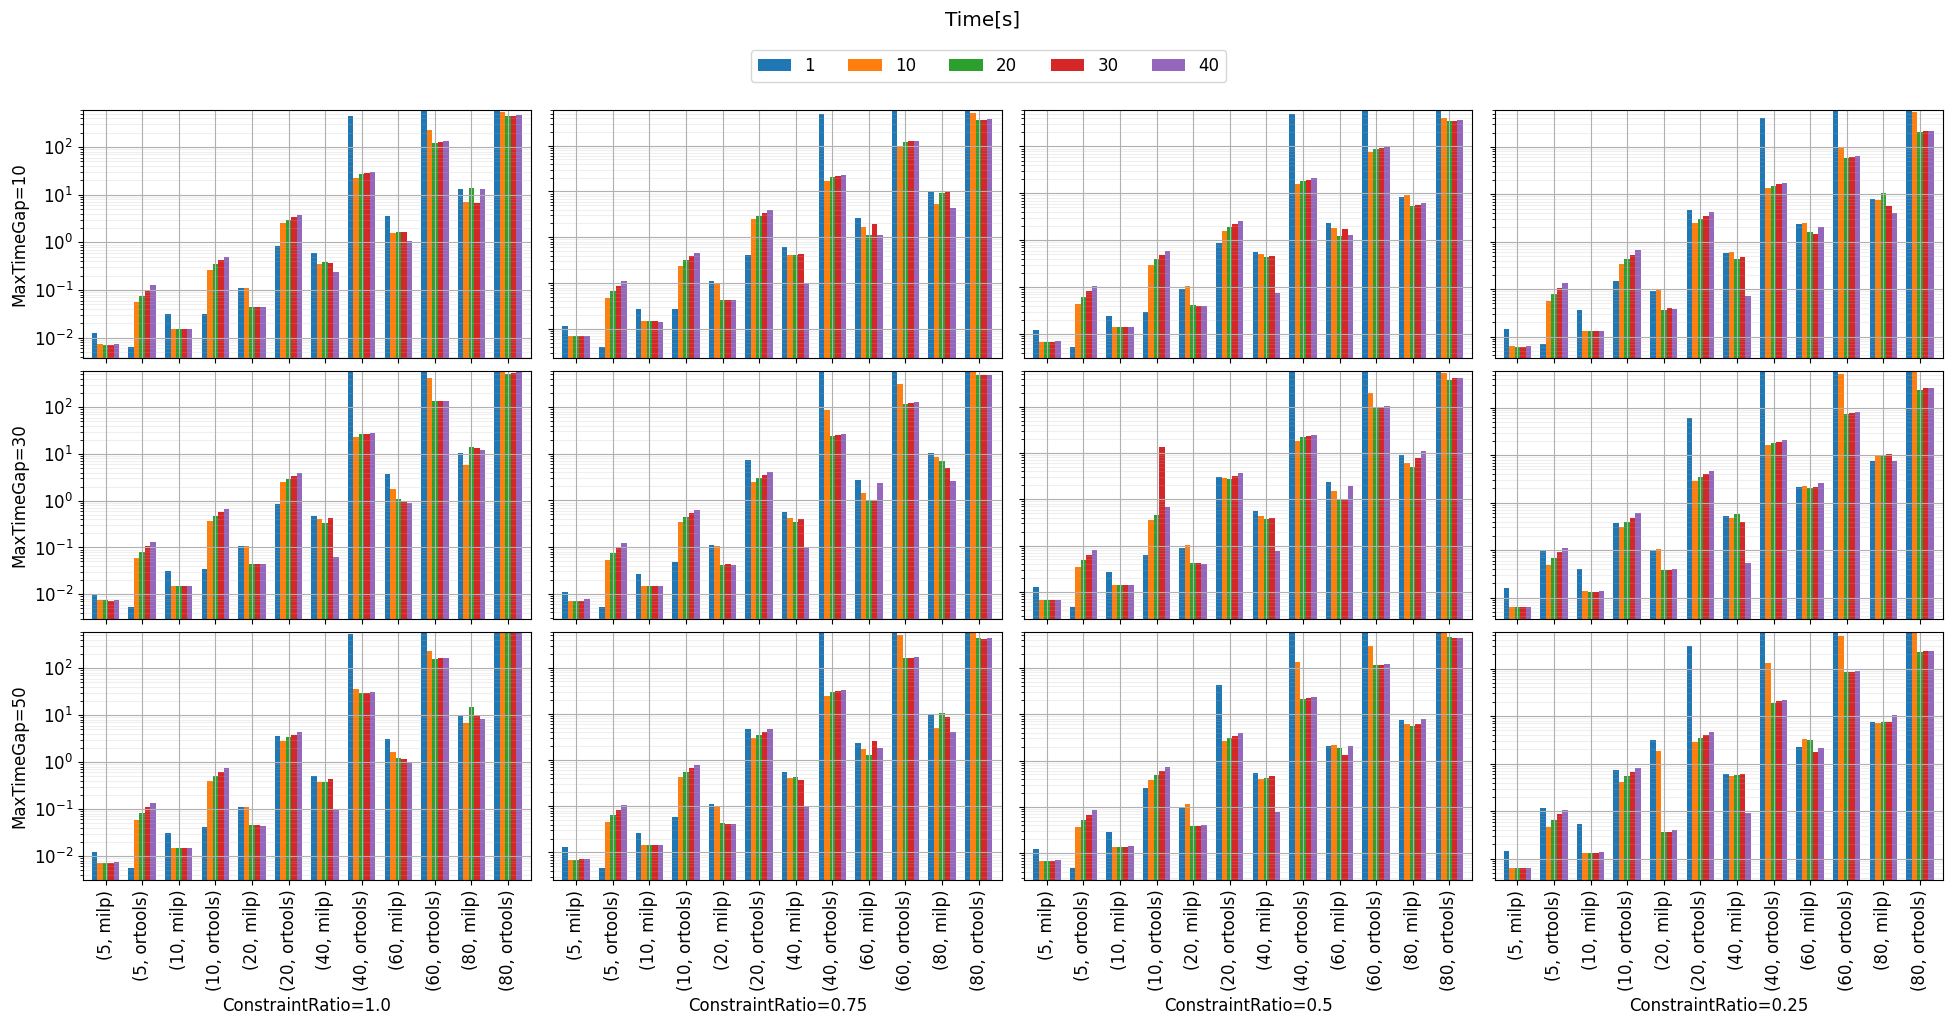

In [30]:
plt.rcParams.update({"font.size": 12})


Solvers = df["Solver"].unique()
print(Solvers)

Nodes = df["Node"].unique()
print(Nodes)

ConstraintRatio = df["ConstraintRatio"].unique()
print(ConstraintRatio)
# ConstraintRatio = [1, 0.25]

MaxTimeGap = df["MaxTimeGap"].unique()
print(MaxTimeGap)
# MaxTimeGap = [10, 50]

Agents = df["Agent"].unique()
print(Agents)

xLabel = "MaxTimeGap"
yLabel = "ConstraintRatio"
zLabel = "Solver"
xElems = MaxTimeGap
yElems = ConstraintRatio
zElems = Solvers
evalColumn = "Time[s]"


fig, axes = plt.subplots(nrows=len(xElems), ncols=len(yElems), figsize=(24, 10))
# fig, axes = plt.subplots(nrows=len(xElems), ncols=len(yElems), figsize=(16, 10))
for irow, xelem in enumerate(xElems):
    for icol, yelem in enumerate(yElems):
        # sns.boxplot(
        #     data=df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)],
        #     x="Node",
        #     y="Time[s]",
        #     hue=df[['Agent', 'Solver',]].apply(tuple, axis=1),
        #     ax=axes[irow, icol],
        #     legend=False,
        #     palette="Set1",
        #     )
        df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)]\
            .groupby(["Node", "Agent", "Solver"])['Time[s]'].mean().reset_index()\
            .set_index(["Node", "Solver", "Agent"]).unstack()\
            .plot(
                kind="bar",
                y="Time[s]",
                grid=True,
                # rot=0,
                ax=axes[irow, icol],
                ylim=(0, 600),
                legend=False,
                logy=True,
                width=0.75,
            )

        # sns.boxplot(
        #     data=df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)],
        #     x="Node",
        #     y="Time[s]",
        #     hue='Agent',
        #     ax=axes[irow, icol],
        #     legend=True if irow==len(xElems)-1 and icol==len(yElems)-1 else False,
        #     palette="Set1",
        #     )
        # df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)]\
        # .boxplot(
        #     column=[evalColumn],
        #     by=["Agent"],
        #     grid=True,
        #     rot=90,
        #     ax=axes[irow, icol],
        # )
        axes[irow, icol].set_yscale("log")

        axes[irow, icol].grid("on", which="minor", axis="x", alpha=0.2)
        axes[irow, icol].grid("on", which="minor", axis="y", alpha=0.2)

        if icol == 0:
            axis = axes[irow, icol].get_yaxis()
            axis.set_label_text(f"{xLabel}={xelem}")
        else:
            axis = axes[irow, icol].get_yaxis()
            # axis.set_ticks_position('none')
            # axis.set_label_text()
            axis.set_major_formatter(NullFormatter())
            # axis.set_visible(False)
            axes[irow, icol].set(xlabel=None)

        if irow == len(xElems) - 1:
            axis = axes[irow, icol].get_xaxis()
            axis.set_label_text(f"{yLabel}={yelem}")
        else:
            axis = axes[irow, icol].get_xaxis()
            # axis.set_label_text()
            # axis.set_ticks_position('none')
            axis.set_major_formatter(NullFormatter())
            # axis.set_visible(False)
            axes[irow, icol].set(xlabel=None)


consts = {c: df[c].iloc[0] for c in df.columns if len(df[c].unique()) == 1}
const_strs = [f"{k}={v}" for k, v in consts.items()]
const_str = " ".join(const_strs)
# fig.suptitle(f"{evalColumn} with Constants of {const_str}")
fig.suptitle(f"{evalColumn}")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# fig.tight_layout()
plt.legend(
    bbox_to_anchor=(0.4, 0.9),
    loc="lower left",
    bbox_transform=fig.transFigure,
    ncol=len(Agents)*len(Solvers),
)
plt.savefig(f"benchmark.png", dpi=300)

# OR-Tools Solver Comparison

In [11]:
df_original = pd.read_csv("benchmark_ortoolsolvers.csv")
df_original.head()

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark_ortoolsolvers.csv'

In [ ]:
# Replace the time of the rows whose costs are infinite
### Inplace
df = copy.deepcopy(df_original)
df.loc[df["Cost"] == float("inf"), "Time[s]"] = 180
### Edit the copied df.
# df[df["Cost"] == float("inf")]["Time[s]"] = 180

In [ ]:
plt.rcParams.update({"font.size": 12})


# Get a list of arguments

Solvers = df["Solver"].unique()
print(Solvers)

Nodes = df["Node"].unique()
print(Nodes)

ConstraintRatio = df["ConstraintRatio"].unique()
print(ConstraintRatio)

MaxTimeGap = df["MaxTimeGap"].unique()
print(MaxTimeGap)

Agents = df["Agent"].unique()
print(Agents)

xLabel = "Node"
yLabel = "Agent"
xElems = Nodes
yElems = Agents

fig, axes = plt.subplots(nrows=len(xElems), ncols=len(yElems), figsize=(12, 5))

for irow, xelem in enumerate(xElems):
    for icol, yelem in enumerate(yElems):
        df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)].boxplot(
            column=["Time[s]"],
            by=["Solver"],
            grid=True,
            rot=90,
            ax=axes[irow, icol],
        )
        # .plot(
        #     kind="box",
        #     # x="Solver",
        #     y="Time[s]",
        #     grid=True,
        #     # rot=0,
        #     ax=axes[irow, icol],
        #     ylim=(0, 180),
        #     legend=False,
        #     logy=True,
        #     # width=0.75,
        # )
        axes[irow, icol].set_yscale("log")

        axes[irow, icol].grid("on", which="minor", axis="x", alpha=0.2)
        axes[irow, icol].grid("on", which="minor", axis="y", alpha=0.2)

        if icol == 0:
            axis = axes[irow, icol].get_yaxis()
            axis.set_label_text(f"{xLabel}={xelem}")
        else:
            axis = axes[irow, icol].get_yaxis()
            axis.set_major_formatter(NullFormatter())
            axes[irow, icol].set(xlabel=None)

        if irow == len(xElems) - 1:
            axis = axes[irow, icol].get_xaxis()
            axis.set_label_text(f"{yLabel}={yelem}")
        else:
            axis = axes[irow, icol].get_xaxis()
            axis.set_major_formatter(NullFormatter())
            axes[irow, icol].set(xlabel=None)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# fig.tight_layout()
# plt.legend(
#     bbox_to_anchor=(0.3, 0.9),
#     loc="lower left",
#     bbox_transform=fig.transFigure,
#     # ncol=len(Agents),
# )
plt.savefig("benchmark_ortoolsovlers.png", dpi=300)

In [12]:
import numpy as np

dictionary = {'Banner':['Type1']*10+['Type2']*10,
              'Northen_californina':np.random.rand(20),
              'Texas':np.random.rand(20)}
df = pd.DataFrame(dictionary)
df.head(20)

,Banner,Northen_californina,Texas
0,Type1,0.602462,0.488427
1,Type1,0.944134,0.046978
2,Type1,0.840122,0.718401
3,Type1,0.774142,0.417529
4,Type1,0.748088,0.034787
5,Type1,0.820976,0.670076
6,Type1,0.611595,0.739474
7,Type1,0.380027,0.014968
8,Type1,0.561152,0.584891
9,Type1,0.205041,0.631814


In [13]:
df = pd.melt(df,id_vars=['Banner'],value_vars=['Northen_californina','Texas'],
             var_name='zone', value_name='amount')
df.head(20)

,Banner,zone,amount
0,Type1,Northen_californina,0.602462
1,Type1,Northen_californina,0.944134
2,Type1,Northen_californina,0.840122
3,Type1,Northen_californina,0.774142
4,Type1,Northen_californina,0.748088
5,Type1,Northen_californina,0.820976
6,Type1,Northen_californina,0.611595
7,Type1,Northen_californina,0.380027
8,Type1,Northen_californina,0.561152
9,Type1,Northen_californina,0.205041


<Axes: xlabel='Banner', ylabel='amount'>

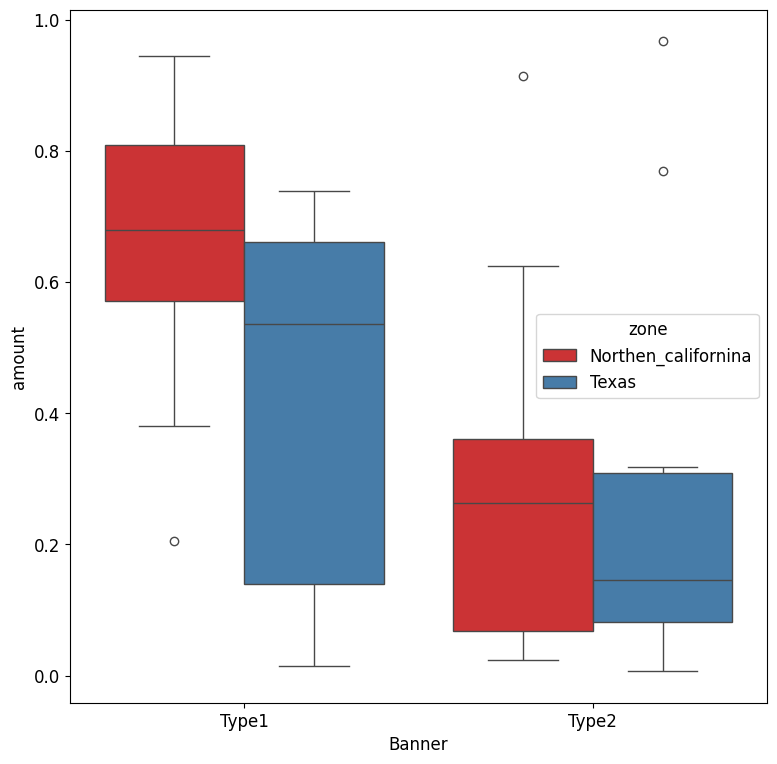

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9)) #for a bigger image
sns.boxplot(x="Banner", y="amount", hue="zone", data=df, palette="Set1")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


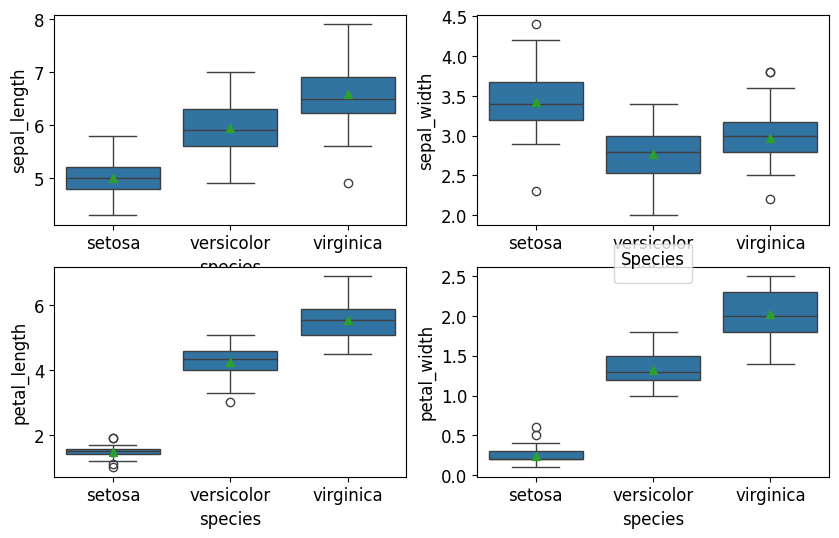

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Generate some data
data = sns.load_dataset("iris")

# Plot the data on each subplot
sns.boxplot(
    x = "species",
    y = "sepal_length",
    showmeans=True,
    ax=axes[0, 0],
    data=data
)

sns.boxplot(
    x = "species",
    y = "sepal_width",
    showmeans=True,
    ax=axes[0, 1],
    data=data
)

sns.boxplot(
    x = "species",
    y = "petal_length",
    showmeans=True,
    ax=axes[1, 0],
    data=data
)

sns.boxplot(
    x = "species",
    y = "petal_width",
    showmeans=True,
    ax=axes[1, 1],
    data=data
)

# Add a legend to the figure
plt.legend(title="Species", loc="upper center", bbox_to_anchor=(0.5, 1.15))

# Show the plot
plt.show()


In [2]:
import pandas as pd

df = pd.read_csv("main_with_tpo_ICRA3.csv").drop(columns=["Tours"])
df.head(20)

/tmp/ipykernel_2816872/3544427757.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Node,Agent,ConstraintRatio,MaxTimeGap,Solver,Iteration,Cost,Time[s]
0,100,1,1.00,10,milp,1,2135.0,20.783045
1,100,1,1.00,30,milp,1,1975.0,35.019159
2,100,1,1.00,50,milp,1,2061.0,27.816689
3,100,1,0.75,10,milp,1,2131.0,20.438581
4,100,1,0.75,30,milp,1,1962.0,23.557795
5,100,1,0.75,50,milp,1,2035.0,26.617458
6,100,1,0.50,10,milp,1,2109.0,25.598609
7,100,1,0.50,30,milp,1,1997.0,27.072886
8,100,1,0.50,50,milp,1,2165.0,17.002936
9,100,1,0.25,10,milp,1,1973.0,20.958638


In [6]:
print(df[df.Node == 160].drop([238])['Time[s]'].mean())
print(df[df.Node == 160].drop([238])['Time[s]'].std())

182.7660633790291
101.79704784822366


In [7]:
print(df[df.Node == 160]['Time[s]'].mean())
print(df[df.Node == 160]['Time[s]'].std())

209.73510770400364
232.00595274786505
